<a href="https://colab.research.google.com/github/FarrahBashirr/silver-memory/blob/main/Thesis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting mood from song lyrics using machine learning techniques.



## The main aim behind this study

We need to perform sentiment analysis on song lyrics in order to predict the mood of the song according to what is being said in the song itself not taking into consideration any of the following factors: Acousticness, Danceability, Energy, Instumentalness, Liveness, Loudness, Speechiness, Valence, and Tempo. 

What our model will target is only basing the mood or the tone of the song according to the lyrics of the song.

## Dataset Description

The dataset consists of song names, lyrics, along with the artists and the song moods ranging from year 2002 uptil year 2020.

<br>

<b>Description of Dataset Columns:</b>

- <b>Number:</b> Row number.
- <b>Artist:</b> The artist's name.
- <b>Album:</b> The name of the album which the song belongs to.
- <b>Year:</b> The year that the song was released in.
- <b>Date:</b> The exact date that the song was released in.
- <b>Lyric:</b> The lyrics of the song.
- <b>Mood:</b> Describes the tone of the song which is either 'Happy' or 'Sad'


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import string
import re

import nltk
from nltk import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from bs4 import BeautifulSoup


%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

df = pd.read_csv('https://raw.githubusercontent.com/FarrahBashirr/silver-memory/main/Dataset.csv?token=GHSAT0AAAAAACAS6RRHHFK2ZVDCMIBRFDXWZDBM4DA')

df.head()


Number        Artist                          Title  \
0       1        Khalid                       Location   
1       2        Khalid                         Better   
2       3  Selena Gomez                    Back to You   
3       4  Selena Gomez  The Heart Wants What It Wants   
4       5  Selena Gomez                  Same Old Love   

                     Album  Year        Date  \
0            American Teen  2016  30/04/2016   
1                  Suncity  2018  14/09/2018   
2  Rare (Target Exclusive)  2018  10/05/2018   
3                  For You  2014  06/11/2014   
4                  Revival  2015  10/09/2015   

                                               Lyric   Mood  
0  send me your location let's focus on communica...  Happy  
1  better nothing baby nothing feels better i'm n...  Happy  
2  took you like a shot thought that i could chas...  Happy  
3  what the heart wants what the heart wants what...    Sad  
4  produced by benny blanco and stargate written ...    Sad

## Data Inspection 

This step is done in order to inspect the dataset and visualize it to be able to understand the data that we're dealing with better. 

In [2]:
df.tail(5)

# Displaying the last 5 rows in the table.

Number    Artist                      Title           Album  Year  \
39      40  Maroon 5                      Sugar               V  2015   
40      41  Maroon 5                       Maps               V  2014   
41      42  Maroon 5                    Animals               V  2014   
42      43  Maroon 5                     Misery  Hands All Over  2010   
43      44  Maroon 5  Moves Like Jagger (Remix)             NaN  2011   

          Date                                              Lyric   Mood  
39  13/01/2015  directed by david dobkin   i'm hurting baby i'...  Happy  
40  16/06/2014  i miss the taste of a sweeter life i miss the ...    Sad  
41  25/08/2014  baby i'm preying on you tonight hunt you down ...  Happy  
42  22/06/2010  oh yeah oh yeah   so scared of breaking it tha...    Sad  
43  21/06/2011  mac miller uh uh   mac miller there's somethin...  Happy

In [3]:
df.columns

# Displays all the column names in the table.

Index(['Number', 'Artist', 'Title', 'Album', 'Year', 'Date', 'Lyric', 'Mood'], dtype='object')

In [4]:
df.shape

# Displays the number of rows and columns in the dataframe. 

(44, 8)

In [5]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

# Displays the unique values in each column.

Number : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
Artist : ['Khalid' 'Selena Gomez' 'Billie Eilish' 'Charlie Puth' 'Coldplay' 'Drake'
 'Maroon 5']
Title : ['Location' 'Better' 'Back to You' 'The Heart Wants What It Wants'
 'Same Old Love' 'People You Know' 'Slow Down' 'Good for You' 'Wolves'
 'Everything I wanted' 'Bad Guy' 'idontwannabeyouanymore' 'ilomilo'
 'listen before i go' 'Six Feet Under' 'party favor' 'Attention'
 'We Don’t Talk Anymore' 'How Long' 'Cheating on You' 'Fix You'
 'Hymn for the Weekend' 'A Sky Full of Stars' 'Everglow'
 'Adventure of a Lifetime' 'Paradise' 'One Dance' 'Fake Love'
 'Passionfruit' 'Too Good' 'Energy' 'Take Care' 'Signs' 'What Lovers Do'
 'Girls Like You' 'One More Night' 'Payphone' 'Cold' 'She Will Be Loved'
 'Sugar' 'Maps' 'Animals' 'Misery' 'Moves Like Jagger (Remix)']
Album : ['American Teen' 'Suncity' 'Rare (Target Exclusive)' 'For You' 'Revival'
 'Star

In [6]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

# Displays the number of unique values in each column. 

Number: Number of unique values 44
Artist: Number of unique values 7
Title: Number of unique values 44
Album: Number of unique values 24
Year: Number of unique values 13
Date: Number of unique values 42
Lyric: Number of unique values 44
Mood: Number of unique values 2


In [7]:
df.info()

# Displays all columns and their data types. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Number  44 non-null     int64 
 1   Artist  44 non-null     object
 2   Title   44 non-null     object
 3   Album   39 non-null     object
 4   Year    44 non-null     int64 
 5   Date    44 non-null     object
 6   Lyric   44 non-null     object
 7   Mood    44 non-null     object
dtypes: int64(2), object(6)
memory usage: 2.9+ KB


In [8]:
df.describe()

# Displays the statistical summary of the columns with numeric values.

Number         Year
count  44.000000    44.000000
mean   22.500000  2015.136364
std    12.845233     3.534487
min     1.000000  2002.000000
25%    11.750000  2014.000000
50%    22.500000  2016.000000
75%    33.250000  2017.000000
max    44.000000  2020.000000

In [9]:
df.isnull().sum()

# Displays the number of null values under each column.

Number    0
Artist    0
Title     0
Album     5
Year      0
Date      0
Lyric     0
Mood      0
dtype: int64

In [10]:
df.isnull().sum()/ len(df)*100

# Displays the feature wise percentage of null values under each column.

Number     0.000000
Artist     0.000000
Title      0.000000
Album     11.363636
Year       0.000000
Date       0.000000
Lyric      0.000000
Mood       0.000000
dtype: float64

## Data Cleaning

In [11]:
df= df.dropna()
df.isnull().sum()

# Is used to remove any missing values. 

Number    0
Artist    0
Title     0
Album     0
Year      0
Date      0
Lyric     0
Mood      0
dtype: int64

In [12]:
categorical_columns = ['Mood']
df_encode = pd.get_dummies(data = df,
                           columns = categorical_columns,
                           drop_first = True,
                           dtype = 'int8')

# One Hot Encoding for 'Mood' column. 

## A better view of what we want to see

In [13]:
df_copy = df[['Lyric', 'Mood']].copy()
df_copy

# This step only shows the two columns we'll be working on which are the 'Lyric' column and the 'Mood' column. 

Lyric   Mood
0   send me your location let's focus on communica...  Happy
1   better nothing baby nothing feels better i'm n...  Happy
2   took you like a shot thought that i could chas...  Happy
3   what the heart wants what the heart wants what...    Sad
4   produced by benny blanco and stargate written ...    Sad
5   you were runnin' through me like water now the...    Sad
6   now that i have captured your attention i wann...    Sad
7   produced by hitboy nick monson  rock mafia wri...  Happy
9   i had a dream i got everything i wanted not wh...    Sad
10  white shirt now red my bloody nose sleepin' yo...  Happy
11  don't be that way fall apart twice a day i jus...    Sad
12  told you not to worry but maybe that's a lie h...  Happy
13  take me to the rooftop i wanna see the world w...    Sad
15  hey leave a message   hey call me back when ya...    Sad
16  woahoh hmhmm   you've been runnin' 'round runn...    Sad
17  charlie puth we don't talk anymore we don't ta...    Sad
18  alright ooh yeah   i'll admit i was wrong what...    Sad
20  chris martin when you try your best but you do...    Sad
21  beyoncé and said drink from me drink from me o...  Happy
22  'cause you're a sky 'cause you're a sky full o...  Happy
23  oh they say people come say people go this par...  Happy
24  indecipherable   turn your magic on umi she'd ...  Happy
25  oohoohooh oohoohooh oohoohooh oohoohooh oohooh...  Happy
26  kyla baby i like your style   drake grips on y...  Happy
27  i've been down so long it look like up to me t...    Sad
28  moodymann hold on hold on fuck that fuck that ...  Happy
29  drake oh yeah yeah yeah oh yeah yeah yeah yeah...  Happy
30  produced by boida  ob o'brien   dj jah walton ...  Happy
31  rihanna i know you've been hurt by someone els...    Sad
33  adam levine say say say hey hey now baby oh ma...  Happy
34  spent 4 hours i need more hours with you you s...  Happy
35  ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh oo...  Happy
36  adam levine i'm at a payphone trying to call h...    Sad
37  adam levine cold enough to chill my bones it f...    Sad
38  beauty queen of only eighteen she had some tro...    Sad
39  directed by david dobkin   i'm hurting baby i'...  Happy
40  i miss the taste of a sweeter life i miss the ...    Sad
41  baby i'm preying on you tonight hunt you down ...  Happy
42  oh yeah oh yeah   so scared of breaking it tha...    Sad

**Word Cloud**

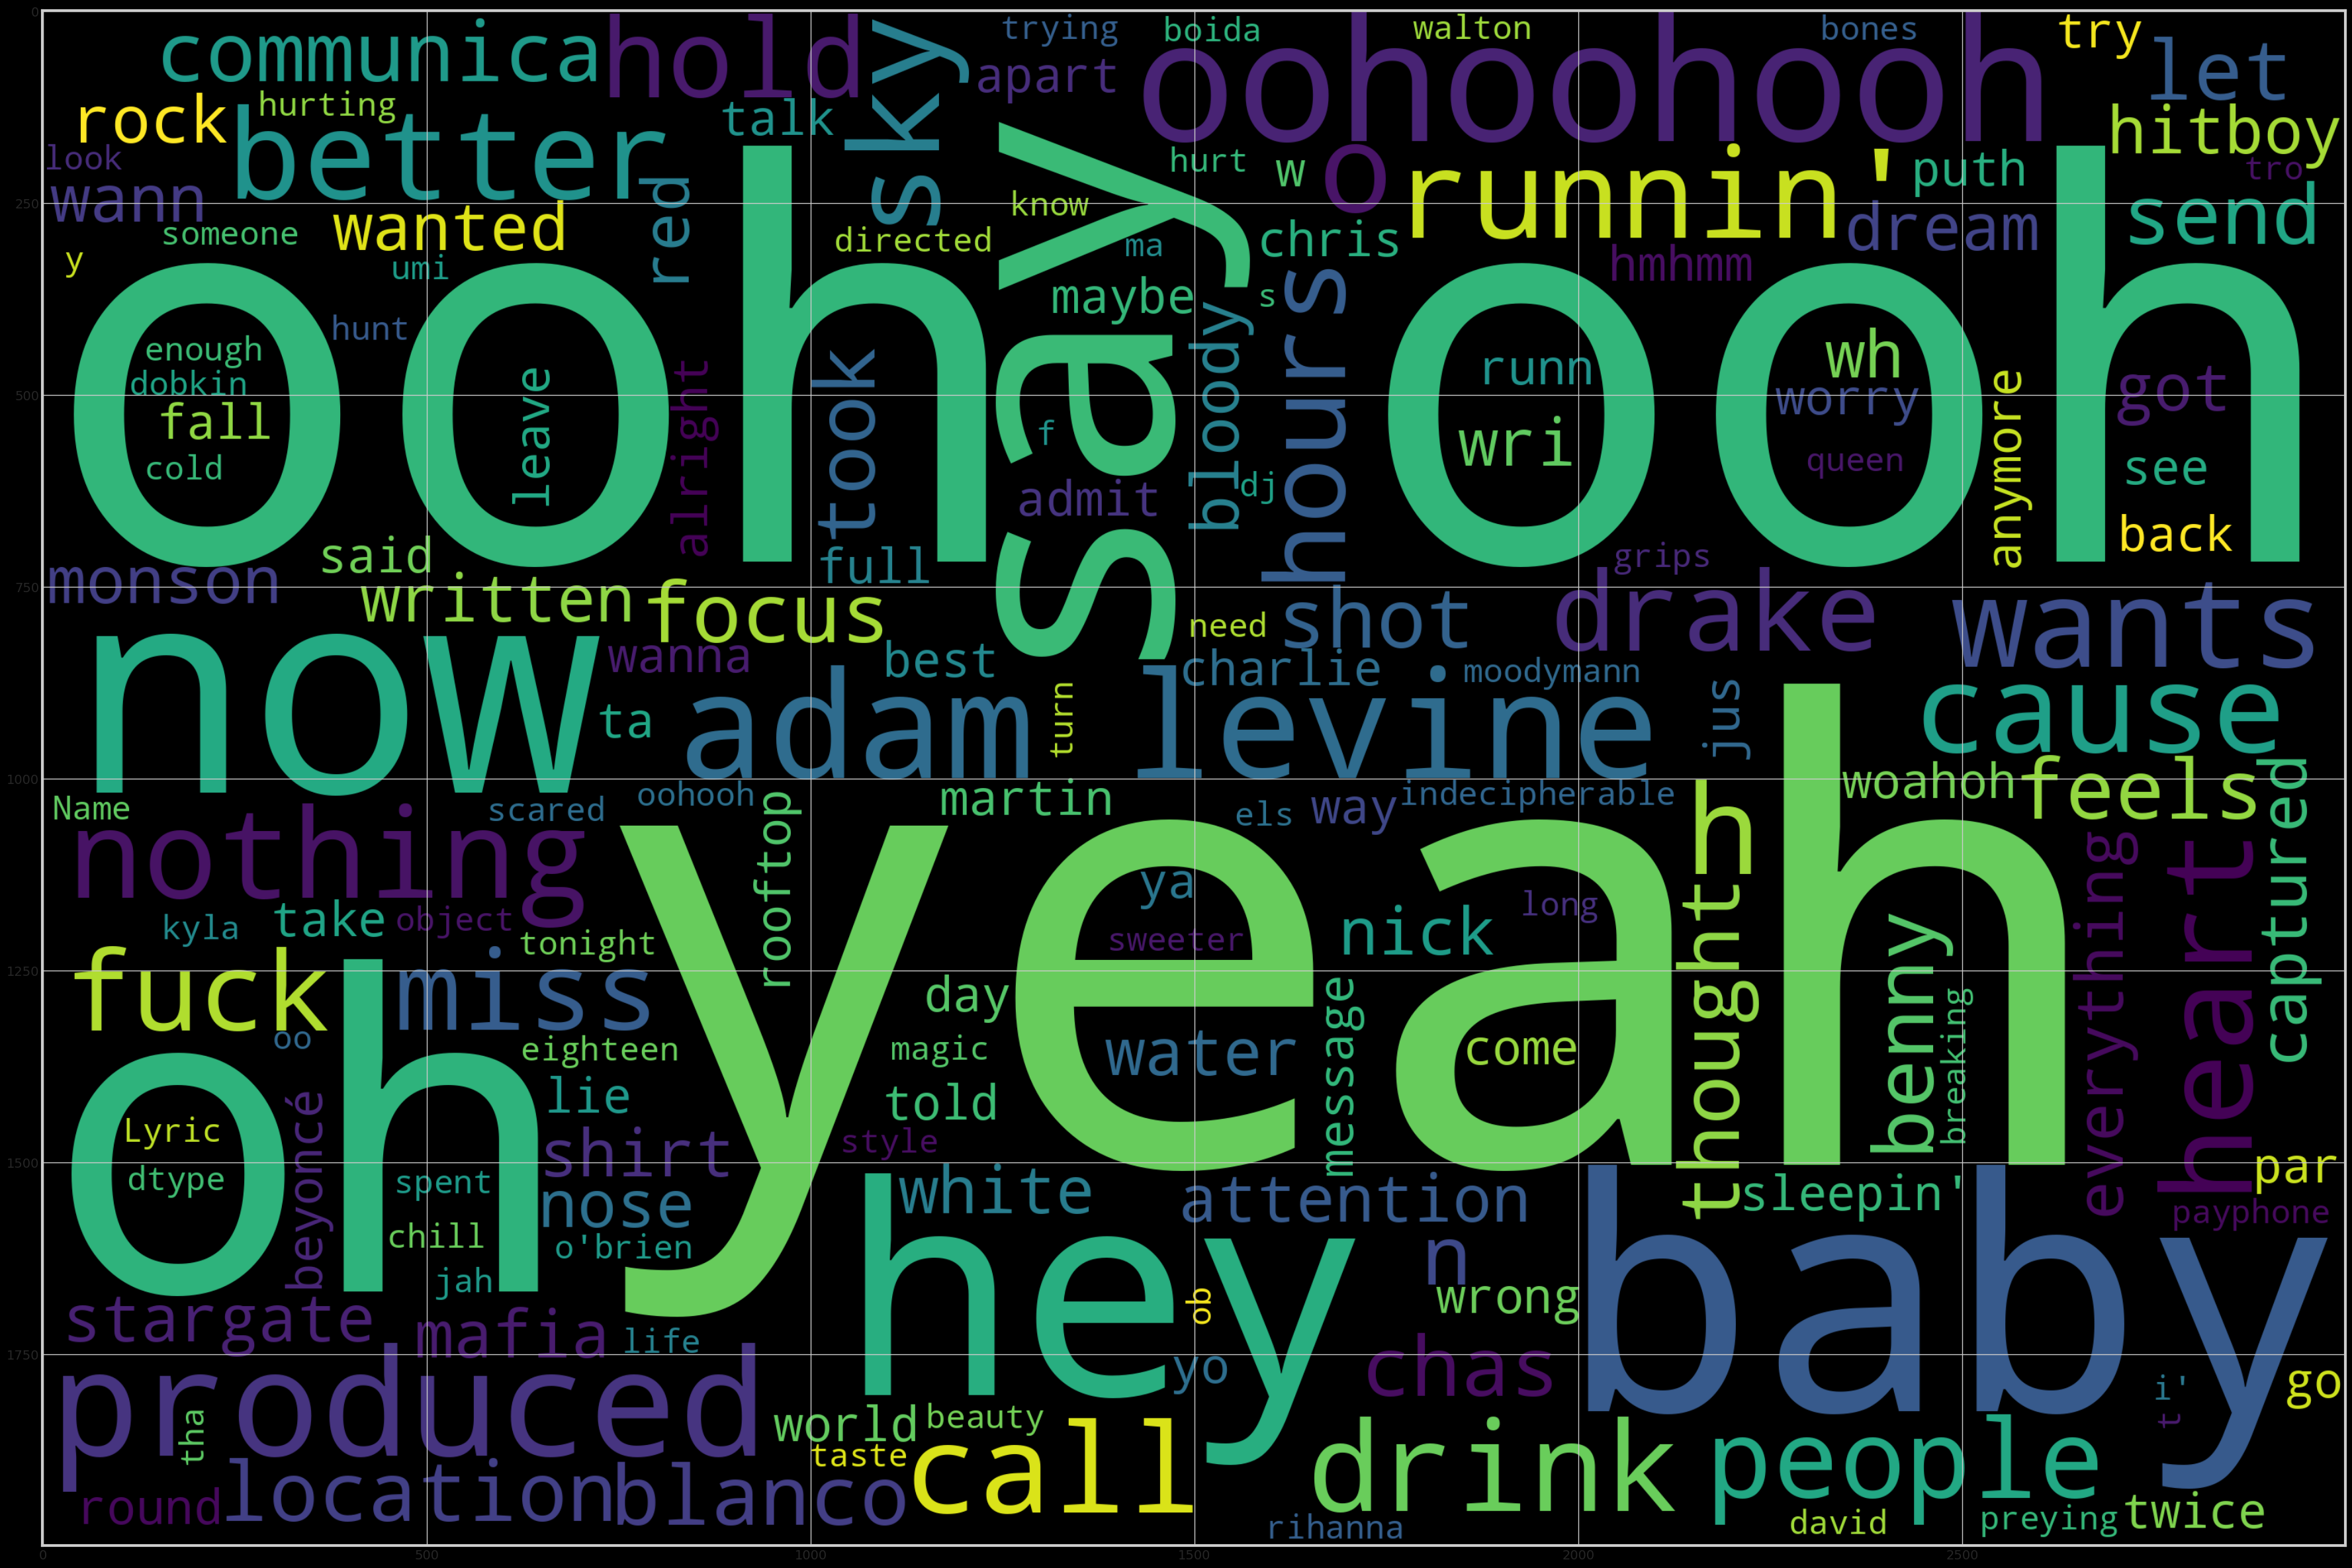

In [14]:
# !pip install wordcloud
# import wordcloud as wc

text = df_copy["Lyric"]

wordcloud = wc.WordCloud(
    width = 3000,
    height = 2000,
    stopwords = wc.STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

### Lowercase Conversion and Removing Digits

In [15]:
# import re

df_copy['Lyric'] = df_copy['Lyric'].apply(lambda review : re.sub(r"[0-9]", " ", review.lower()))
df_copy['Lyric']

# This is done in order to lowercase the letter and remove any possible digits if there is. 

0     send me your location let's focus on communica...
1     better nothing baby nothing feels better i'm n...
2     took you like a shot thought that i could chas...
3     what the heart wants what the heart wants what...
4     produced by benny blanco and stargate written ...
5     you were runnin' through me like water now the...
6     now that i have captured your attention i wann...
7     produced by hitboy nick monson  rock mafia wri...
9     i had a dream i got everything i wanted not wh...
10    white shirt now red my bloody nose sleepin' yo...
11    don't be that way fall apart twice a day i jus...
12    told you not to worry but maybe that's a lie h...
13    take me to the rooftop i wanna see the world w...
15    hey leave a message   hey call me back when ya...
16    woahoh hmhmm   you've been runnin' 'round runn...
17    charlie puth we don't talk anymore we don't ta...
18    alright ooh yeah   i'll admit i was wrong what...
20    chris martin when you try your best but yo

### Tokenization

In [16]:
# !pip install nltk
# import nltk
# from nltk import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

df_copy['Lyric'] = df_copy['Lyric'].apply(lambda review: tokenizer.tokenize(review))
df_copy['Lyric']

# This step is done in order to split text into smaller units known as tokens (words, numbers, etc).
# It is also useful for separating phrase-terminating punctuation from adjacent tokens. 
# Example: Don't becomes ["do","n't"]

0     [send, me, your, location, let, 's, focus, on,...
1     [better, nothing, baby, nothing, feels, better...
2     [took, you, like, a, shot, thought, that, i, c...
3     [what, the, heart, wants, what, the, heart, wa...
4     [produced, by, benny, blanco, and, stargate, w...
5     [you, were, runnin, ', through, me, like, wate...
6     [now, that, i, have, captured, your, attention...
7     [produced, by, hitboy, nick, monson, rock, maf...
9     [i, had, a, dream, i, got, everything, i, want...
10    [white, shirt, now, red, my, bloody, nose, sle...
11    [do, n't, be, that, way, fall, apart, twice, a...
12    [told, you, not, to, worry, but, maybe, that, ...
13    [take, me, to, the, rooftop, i, wan, na, see, ...
15    [hey, leave, a, message, hey, call, me, back, ...
16    [woahoh, hmhmm, you, 've, been, runnin, ', 'ro...
17    [charlie, puth, we, do, n't, talk, anymore, we...
18    [alright, ooh, yeah, i, 'll, admit, i, was, wr...
20    [chris, martin, when, you, try, your, best

### Removing Stopwords

In [17]:
!pip install --upgrade nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words

# This step is done in order to view all the stop words in the lyrics that dont contribute to the overall meaning. 
# Examples include: "a", "the", "is", "are", "I", etc.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
negation_list = ["no","nor", "not", "n't"]

stop_words = [word for word in stop_words if word not in negation_list]
stop_words

# This step is done in order to pick out negations from the stopwords list so that they're not removed.
# Negations are needed for the performance of the prediction model. 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
df_copy['Lyric'] = df_copy['Lyric'].apply(lambda review: [word for word in review if word not in stop_words])
df_copy['Lyric'].tolist()

#This step is done to remove stopwords from "Lyric" column.

[['send',
  'location',
  'let',
  "'s",
  'focus',
  'communicating',
  "'cause",
  'need',
  'time',
  'place',
  'come',
  'place',
  'come',
  'send',
  'location',
  'let',
  "'s",
  'ride',
  'vibrations',
  "n't",
  'need',
  'nothing',
  'else',
  'not',
  'need',
  'nothing',
  'else',
  'times',
  'wonder',
  'fool',
  'new',
  'new',
  'initially',
  "n't",
  'wan',
  'na',
  'fall',
  'gather',
  'attention',
  "n't",
  'take',
  'advantage',
  "n't",
  'leave',
  'heart',
  'damaged',
  'understand',
  'things',
  'go',
  'little',
  'bit',
  'better',
  'plan',
  'oh',
  'wo',
  "n't",
  'send',
  'location',
  'let',
  "'s",
  'focus',
  'communicating',
  "'cause",
  'need',
  'time',
  'place',
  'come',
  'send',
  'location',
  'let',
  "'s",
  'ride',
  'vibrations',
  "n't",
  'need',
  'nothing',
  'else',
  "n't",
  'need',
  'nothing',
  'else',
  "n't",
  'wan',
  'na',
  'fall',
  'love',
  'subtweets',
  'let',
  "'s",
  'get',
  'personal',
  'got',
  'lot',

## Punctuation

In [20]:
# import string

df_copy['Lyric'] = df_copy['Lyric'].apply(lambda review : list(filter(None,[word.replace('.', '').replace('_','').replace('-','').replace("'","" ).replace("`","") for word in review if word not in string.punctuation])))

df_copy['Lyric']

# This step is done in order to remove puncuations, dots, dashes, or empty strings.


0     [send, location, let, s, focus, communicating,...
1     [better, nothing, baby, nothing, feels, better...
2     [took, like, shot, thought, could, chase, cold...
3     [heart, wants, heart, wants, heart, wants, wan...
4     [produced, benny, blanco, stargate, written, b...
5     [runnin, like, water, feeling, s, leavin, dry,...
6     [captured, attention, wan, na, steal, rhythm, ...
7     [produced, hitboy, nick, monson, rock, mafia, ...
9     [dream, got, everything, wanted, not, d, think...
10    [white, shirt, red, bloody, nose, sleepin, re,...
11    [nt, way, fall, apart, twice, day, wish, could...
12    [told, not, worry, maybe, s, lie, honey, s, hu...
13    [take, rooftop, wan, na, see, world, stop, bre...
15    [hey, leave, message, hey, call, back, ya, get...
16    [woahoh, hmhmm, ve, runnin, round, runnin, rou...
17    [charlie, puth, nt, talk, anymore, nt, talk, a...
18    [alright, ooh, yeah, ll, admit, wrong, else, s...
20    [chris, martin, try, best, nt, succeed, ge

## Lemmatization

***Natural Language Processing (NLP) Technqiues:***

**1) Sentiment Analysis**

It tends to dissect data in order to determine whether it's positive, negative, or neutral.

**2) Named Entity Recognition:**

It tags ‘named identities’ within text and extracts them for further analysis.
It simply tags the identities, whether they are organization names, people, proper nouns, locations, etc., and keeps a running tally of how many times they occur within a dataset.

**3) Text Summary:**

It breaks down jargon, whether scientific, medical, technical or other, into its most basic terms using natural language processing in order to make it more understandable.

**4) Topic Modelling:**

It's an unsupervised Natural Language Processing (NLP) technique. It analyzes documents to identify common themes and provide an adequate cluster. For example, a topic modeling algorithm could identify whether incoming documents are contracts, invoices, complaints, or more based on their contents. It tends to understand unstructued data without predefined tags or training data.

**5) Text Classification:**
Text classification takes your text dataset then structures it for further analysis. It is often used to mine helpful data from customer reviews as well as customer service slogs.
Topic Modelling, Keyword Extraction, and Sentiment Analysis are all subsets of Text Classification. 

**6) Keywrd Extraction:**

It is the automated process of extracting the most relevant information from text using AI and machine learning algorithms.

**7) Stemming and Lemmitization:**
Stemming is the process of extracting the root of the word. The root words doesn't need to carry a semantic meaning.

Lemmatization, which is the process extracting the base form of the word, namely Lemma, which has a semantic meaning. It works on removing the inflectional endings.




Out of all the above mentioned technqiues, **Lemmatization** will be the most useful technqiue in order to have more accurate results than **Stemming**. 

In [21]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

df_copy['Lyric'] = df_copy['Lyric'].apply(lambda review: [lemmatizer.lemmatize(word) for word in review])
df_copy['Lyric']

# Applying the Lemmatization NLP technqiue to extract the lemma of the words.

[nltk_data] Downloading package wordnet to /root/nltk_data...


0     [send, location, let, s, focus, communicating,...
1     [better, nothing, baby, nothing, feel, better,...
2     [took, like, shot, thought, could, chase, cold...
3     [heart, want, heart, want, heart, want, want, ...
4     [produced, benny, blanco, stargate, written, b...
5     [runnin, like, water, feeling, s, leavin, dry,...
6     [captured, attention, wan, na, steal, rhythm, ...
7     [produced, hitboy, nick, monson, rock, mafia, ...
9     [dream, got, everything, wanted, not, d, think...
10    [white, shirt, red, bloody, nose, sleepin, re,...
11    [nt, way, fall, apart, twice, day, wish, could...
12    [told, not, worry, maybe, s, lie, honey, s, hu...
13    [take, rooftop, wan, na, see, world, stop, bre...
15    [hey, leave, message, hey, call, back, ya, get...
16    [woahoh, hmhmm, ve, runnin, round, runnin, rou...
17    [charlie, puth, nt, talk, anymore, nt, talk, a...
18    [alright, ooh, yeah, ll, admit, wrong, else, s...
20    [chris, martin, try, best, nt, succeed, ge

## Data Preparation for Modelling

In [22]:
df_copy['Lyric']= df_copy['Lyric'].apply(lambda x : " ".join(x))

# This step is done in order to join all the lyrics in each song as one string.

*Splitting Data into Training and Testing*

In [23]:
from sklearn.model_selection import train_test_split

X = df_copy['Lyric'] # Independent Variable
y = df_copy['Mood'] # Dependent Variable

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
happy = x_train[y_train[y_train == 'Happy'].index]
sad = x_train[y_train[y_train == 'Sad'].index]

# This step checks the frequency of words in happy songs and sad songs.

Using Word Cloud to show the frequency of words in both happy songs and sad songs

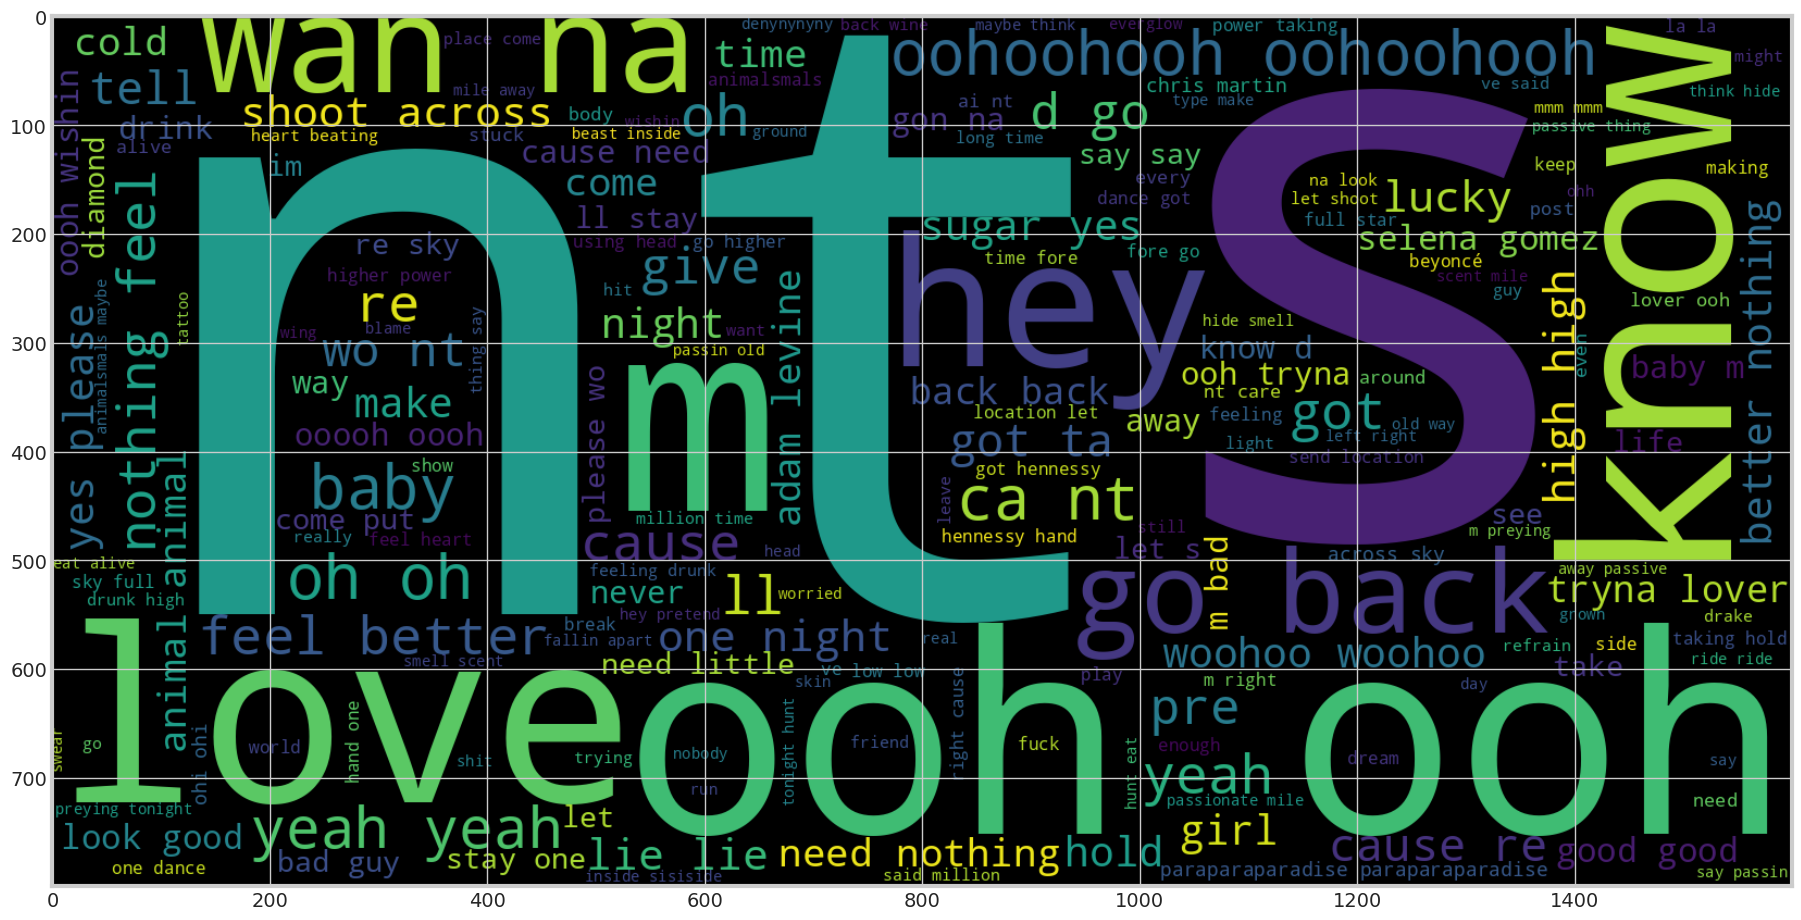

In [25]:
plt.figure(figsize = (20,20))

happy_mood = wc.WordCloud(min_font_size = 3 , width = 1600 , height = 800).generate(" ".join(happy))

plt.imshow(happy_mood,interpolation = 'bilinear')

# Songs with Happy mood.

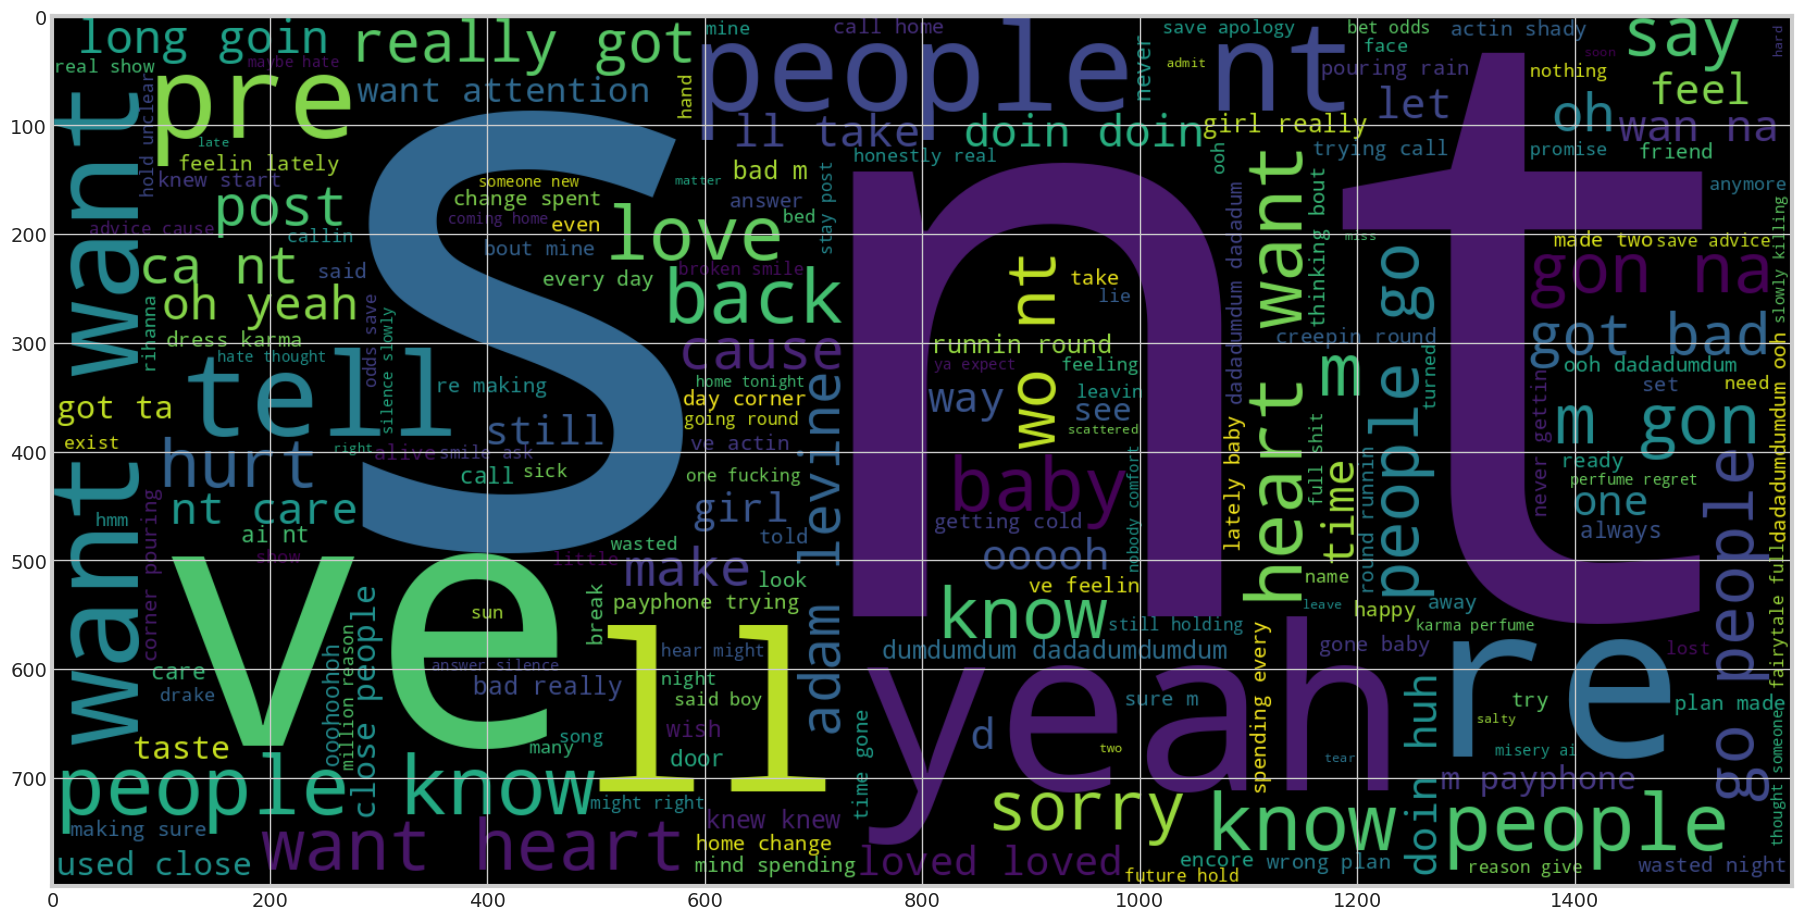

In [26]:
plt.figure(figsize = (20,20)) 

sad_mood = wc.WordCloud( min_font_size = 3 , width = 1600 , height = 800).generate(" ".join(sad))

plt.imshow(sad_mood,interpolation = 'bilinear')

# Songs with Sad mood

#### N-grams

In [27]:
from nltk import ngrams

n_grams_happy = pd.Series(ngrams(" ".join(happy).split(), 3)).value_counts()[:20]
n_grams_sad = pd.Series(ngrams(" ".join(sad).split(), 3)).value_counts()[:20]

Text(0.5, 0, 'No. of Occurances')

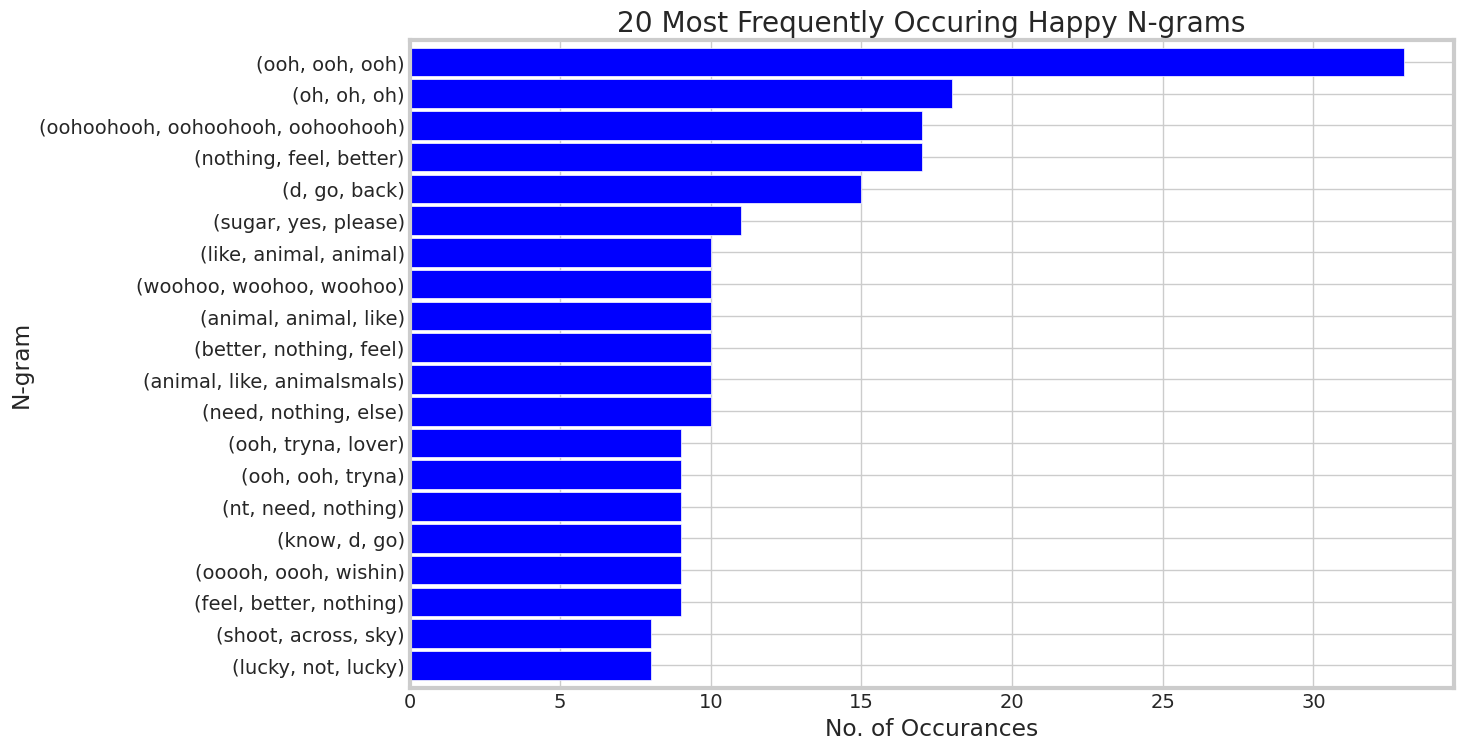

In [28]:
n_grams_happy.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Happy N-grams')
plt.ylabel('N-gram')
plt.xlabel('No. of Occurances')

Text(0.5, 0, 'No. of Occurances')

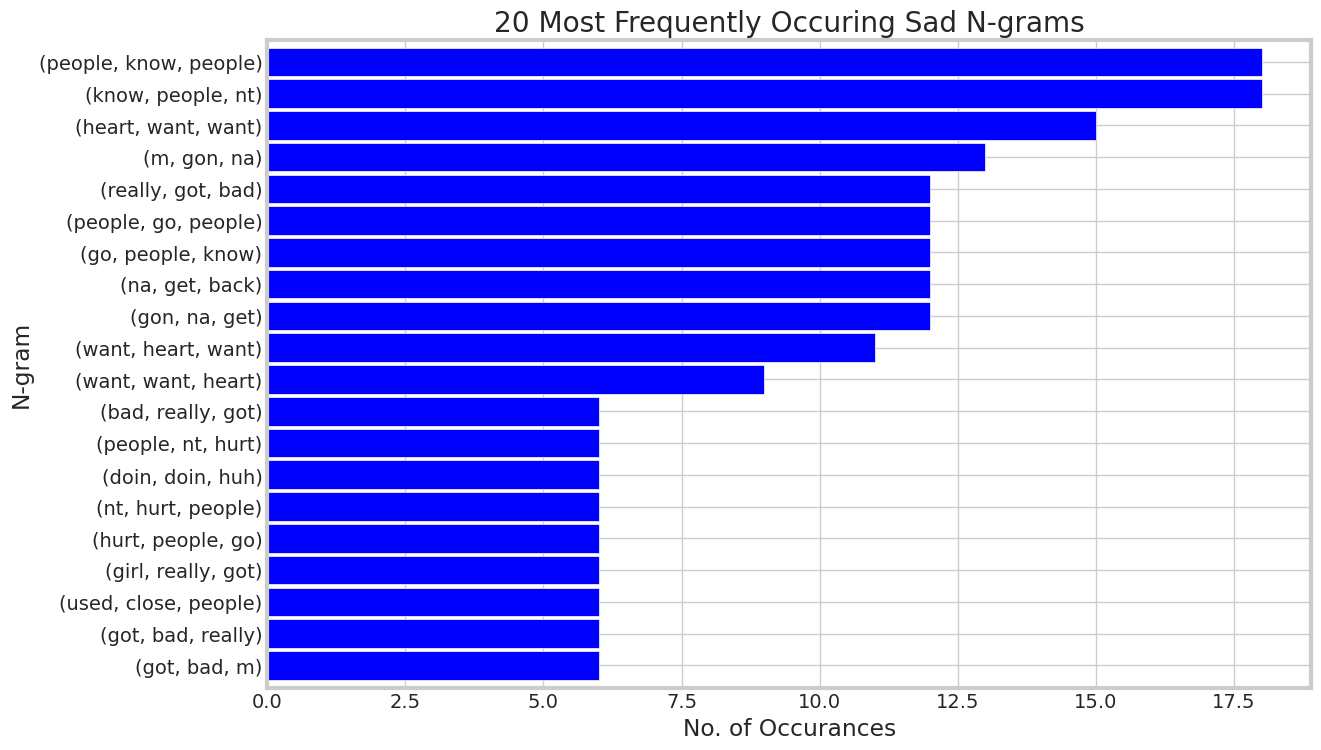

In [29]:
n_grams_sad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Sad N-grams')
plt.ylabel('N-gram')
plt.xlabel('No. of Occurances')

### Encoding Mood

*Encoding Technqiues*

There are numerous technqiues for encoding the mood column. 

These technqiues include:

**1) Bag of Words (BoW)**

**2) Term Frequency - Inverse Document Frequency (TF-IDF)**

There are other technqiues that won't be useful in this study; therefore, for ease of use, bag of words will be used. 

#### Bag of Words (BoW)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features= 15000, ngram_range=(2,3))

cv_train_mood = count_vect.fit_transform(x_train) #transformed train mood

cv_test_mood = count_vect.transform(x_test) #transformed test mood

print('BOW_cv_train:',cv_train_mood.shape)
print('BOW_cv_test:',cv_test_mood.shape)

BOW_cv_train: (27, 5941)
BOW_cv_test: (12, 5941)


#### Modelling using Naive Bayes Classifier

*Multinomial Naive Bayes Classifier*

In [31]:
from sklearn.naive_bayes import MultinomialNB

mn_model = MultinomialNB()

# Using Multinomial Naive Bayes algoirthm in order to turn data into word counts in text.

In [32]:
mn_model.fit(cv_train_mood, y_train)

# Fitting data into model.

MultinomialNB()

*Gaussian Naive Bayes Classifier*

In [33]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# Building a Gaussian Naive Bayes classifier in order to turn data into word counts in text.

In [34]:
model.fit(cv_train_mood.toarray(), y_train)

# Fitting data into model.

GaussianNB()

#### Evaluation for Naive Bayes Classifier

*Multinomial Naive Bayes Classifier*

Reference: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

In [35]:
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score)

y_pred = mn_model.predict(cv_test_mood)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.3333333333333333
F1 Score: 0.40952380952380957


*Gaussian Naive Bayes Classifier*

Reference: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

In [36]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(cv_test_mood.toarray())
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.25
F1 Score: 0.4000000000000001


#### Leave one out cross-validation

Cross-validation techniques are numerous; however, the leave one out cross-validation technique has been deployed for our model due to the fact that it's more precise and accurate for small datasets (maximum 200 records). 

Reference: https://www.analyticsvidhya.com/blog/2021/11/top-7-cross-validation-techniques-with-python-code/

In [37]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut,cross_val_score
iris = load_iris()
X = iris.data
Y = iris.target
loo = LeaveOneOut()
tree = RandomForestClassifier(n_estimators = 10, max_depth = 5, n_jobs = -1)
score = cross_val_score(tree, X, Y, cv = loo)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))


Cross Validation Scores are [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average Cross Validation score :0.9466666666666667


#### Conculsion

The results of our model has shown that the Multinomial Naive Bayes classifier had a higher accuracy and F1 score - which is the harmonic mean of precision and recall - than the Gaussian Naive Bayes classifier. Consequently, the results hsow that the Multinomial Naive Bayes classifier has a better performance on our dataset than the Gaussian Naive Bayes classifier.  

Reference of the rest of the project: https://colab.research.google.com/github/GUC-DM/W2022/blob/main/lab_content/Lab_10_Complete.ipynb